# Sklearn

## sklearn.linear_model

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from sklearn import datasets, linear_model, metrics
from sklearn import model_selection as mod_sel

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

%matplotlib inline

### Линейная регрессия

#### Генерация данных

In [5]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

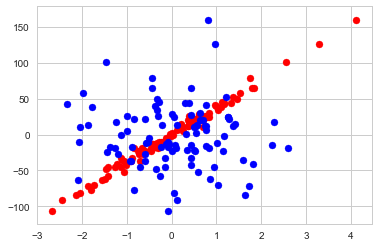

In [7]:
plt.scatter(list(map(lambda x:x[0], data)), target, color = 'r')
plt.scatter(list(map(lambda x:x[1], data)), target, color = 'b')

In [11]:
train_data, test_data, train_labels, test_labels = mod_sel.train_test_split(
    data, target,  
    test_size = 0.3
)

#### LinearRegression

In [12]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [13]:
print(test_labels)

[ 28.15553021  10.33267887  12.42286854 -35.32062686  11.06961035
  25.24428409   0.34799656 -80.80239408  12.67156468  -4.38652971
 -45.27502383  27.83791274 -17.27897399  24.82763821  25.7124082
  58.26281761  13.02656201 -13.26392817 -36.69728864 160.09441244
  41.95683853 -84.32102748 126.64909941 -32.92158843 -22.33224966
  39.70663436 -76.75213382 -70.11132234  17.64282734 -26.87743177]


In [14]:
print(predictions)

[ 22.23512921   8.44590315   6.11851686 -42.61425745  26.48685898
  14.59425278  -2.12085607 -77.68358198  13.95330268  -4.66336204
 -48.3136837   22.41467642 -13.24087117  29.2699772   28.27312644
  58.1086341   18.27537397 -16.25097964 -26.60375118 154.57687146
  44.68688883 -81.86625186 123.17705262 -33.66239075 -28.79517891
  37.45252713 -68.03691066 -66.59701418  19.54210923 -27.50592694]


In [33]:
metrics.mean_absolute_error(test_labels, predictions)

4.366495850590772

In [18]:
linear_scoring = mod_sel.cross_val_score(
    linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
    cv = 10
)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779697, std: 1.0737104492890193


In [19]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [20]:
linear_scoring = mod_sel.cross_val_score(
    linear_regressor, data, target, scoring=scorer, 
    cv = 10
)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779697, std: 1.0737104492890193


In [21]:
coef

array([38.07925837,  0.        ])

In [22]:
linear_regressor.coef_

array([37.81601695, -0.34951554])

In [23]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.5105239494561418

In [25]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [26]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(
    linear_regressor.coef_[0],
    linear_regressor.coef_[1], 
    linear_regressor.intercept_
))

y = 37.82*x1 + -0.35*x2 + -0.51


#### Lasso

In [27]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [28]:
lasso_scoring = mod_sel.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [29]:
print(lasso_regressor.coef_)

[36.85245903 -0.        ]


In [30]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [32]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 36.85*x1 + -0.00*x2
